In [1]:
import pandas as pd 
import numpy as np
import random 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.tree import DecisionTreeClassifier 
import statsmodels.api as sm 

## Importing Data_Set of Financial Inclusion in Africa (Kenya, Rwanda, Tanzania)

In [162]:
train = pd.read_csv(r"C:\Users\ppiko\Documents\3. LBS - MBA 20\MBA 20 - Olumide Obanla\1. Data Analysis Club Exercise and Video\Competition\Fin_Inclusion_Africa\Train.csv")

In [264]:
test = pd.read_csv(r"C:\Users\ppiko\Documents\3. LBS - MBA 20\MBA 20 - Olumide Obanla\1. Data Analysis Club Exercise and Video\Competition\Fin_Inclusion_Africa\Test.csv")

In [270]:
iid=test['uniqueid']

In [271]:
iid

0        uniqueid_6056
1        uniqueid_6060
2        uniqueid_6065
3        uniqueid_6072
4        uniqueid_6073
             ...      
10081    uniqueid_2998
10082    uniqueid_2999
10083    uniqueid_3000
10084    uniqueid_3001
10085    uniqueid_3002
Name: uniqueid, Length: 10086, dtype: object

In [164]:
train 

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [5]:
test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [6]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [7]:
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [9]:
train['education_level'].value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [10]:
test['education_level'].value_counts()

Primary education                  5479
Secondary education                1902
No formal education                1836
Tertiary education                  492
Vocational/Specialised training     359
Other/Dont know/RTA                  18
Name: education_level, dtype: int64

In [11]:
train['marital_status'].value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

# Exploratory Analysis of the Data_Set

C:\Users\ppiko\anaconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='household_size', ylabel='Density'>

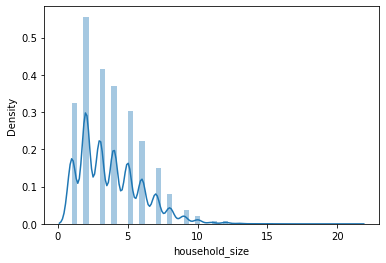

In [12]:
sns.distplot(train['household_size'])

C:\Users\ppiko\anaconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_of_respondent', ylabel='Density'>

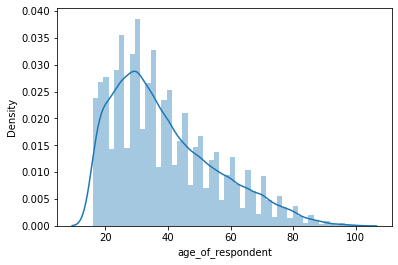

In [13]:
sns.distplot(train['age_of_respondent'])

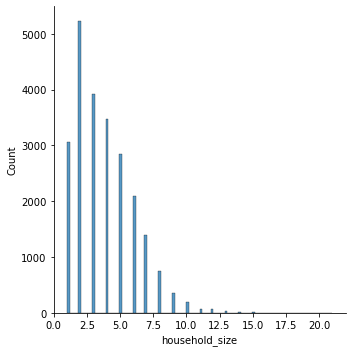

In [14]:
sns.displot(train['household_size'])
plt.show()

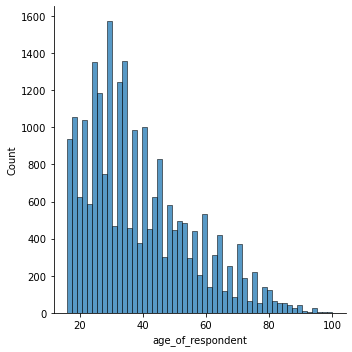

In [15]:
sns.displot(train['age_of_respondent'])
plt.show()

In [16]:
train.groupby('gender_of_respondent').sum()

,year,household_size,age_of_respondent
gender_of_respondent,,,
Female,27989572,52322,536064
Male,19457770,37010,376790


In [23]:
def greet():
    print((train.groupby('gender_of_respondent').sum()))
greet()
    

                          year  household_size  age_of_respondent
gender_of_respondent                                             
Female                27989572           52322             536064
Male                  19457770           37010             376790


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [28]:
train['country'].value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [38]:
train['year'].value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

In [39]:
train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [40]:
train['location_type'].value_counts()

Rural    14343
Urban     9181
Name: location_type, dtype: int64

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [67]:
train.corr()

,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


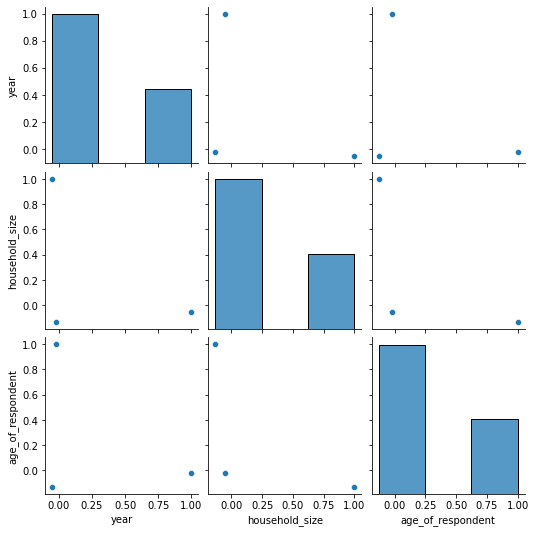

In [69]:
sns.pairplot(train.corr())

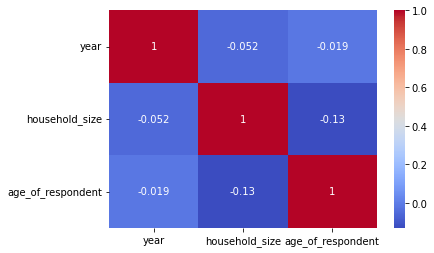

In [71]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.show()

In [77]:
pd.DataFrame(train.value_counts(train['bank_account']))

,0
bank_account,
No,20212
Yes,3312


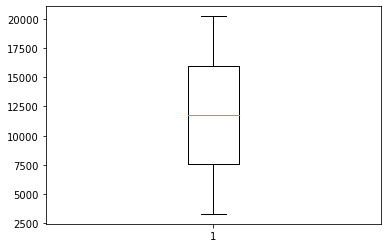

In [88]:
plt.boxplot(train.value_counts(train['bank_account']))
plt.show()

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [93]:
pd.DataFrame(train.value_counts(train['location_type']), columns=['Count'])

,Count
location_type,
Rural,14343
Urban,9181


In [94]:
pd.DataFrame(train.value_counts(train['cellphone_access']), columns=['Count'])

,Count
cellphone_access,
Yes,17454
No,6070


In [95]:
pd.DataFrame(train.value_counts(train['relationship_with_head']), columns=['Count'])

,Count
relationship_with_head,
Head of Household,12831
Spouse,6520
Child,2229
Parent,1086
Other relative,668
Other non-relatives,190


C:\Users\ppiko\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relationship_with_head', ylabel='count'>

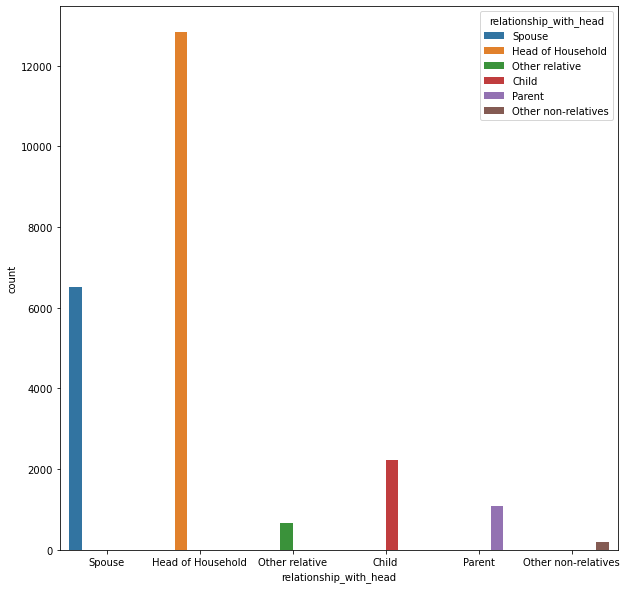

In [110]:
plt.figure(figsize=[10,10])
sns.countplot(train['relationship_with_head'], data=train, hue='relationship_with_head')

In [111]:
pd.DataFrame(train.value_counts(train['marital_status']), columns=['Count'])

,Count
marital_status,
Married/Living together,10749
Single/Never Married,7983
Widowed,2708
Divorced/Seperated,2076
Dont know,8


C:\Users\ppiko\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


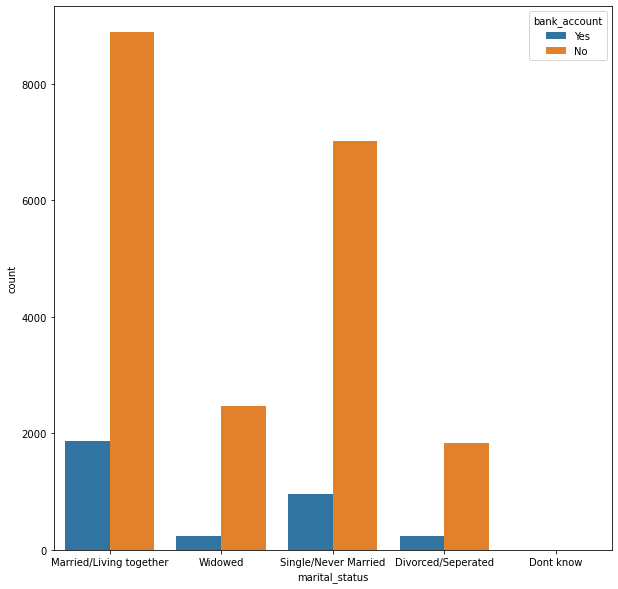

In [113]:
plt.figure(figsize=[10,10])
sns.countplot(train['marital_status'], data=train, hue='bank_account')
plt.show()

In [114]:
pd.DataFrame(train.value_counts(train['education_level']), columns=['Count'])

,Count
education_level,
Primary education,12791
No formal education,4515
Secondary education,4223
Tertiary education,1157
Vocational/Specialised training,803
Other/Dont know/RTA,35


C:\Users\ppiko\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


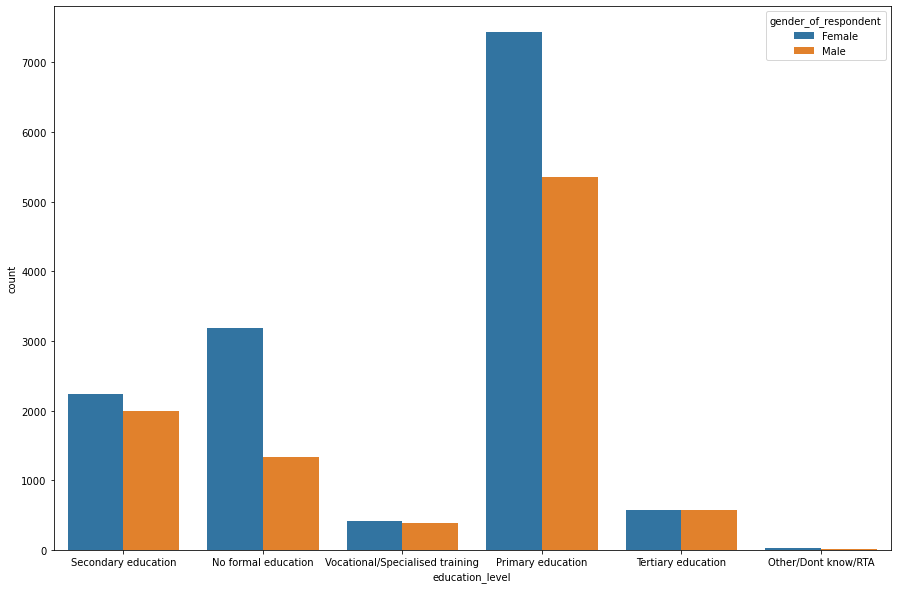

In [120]:
plt.figure(figsize=[15,10])
sns.countplot(train['education_level'], data=train, hue='gender_of_respondent')
plt.show()

C:\Users\ppiko\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


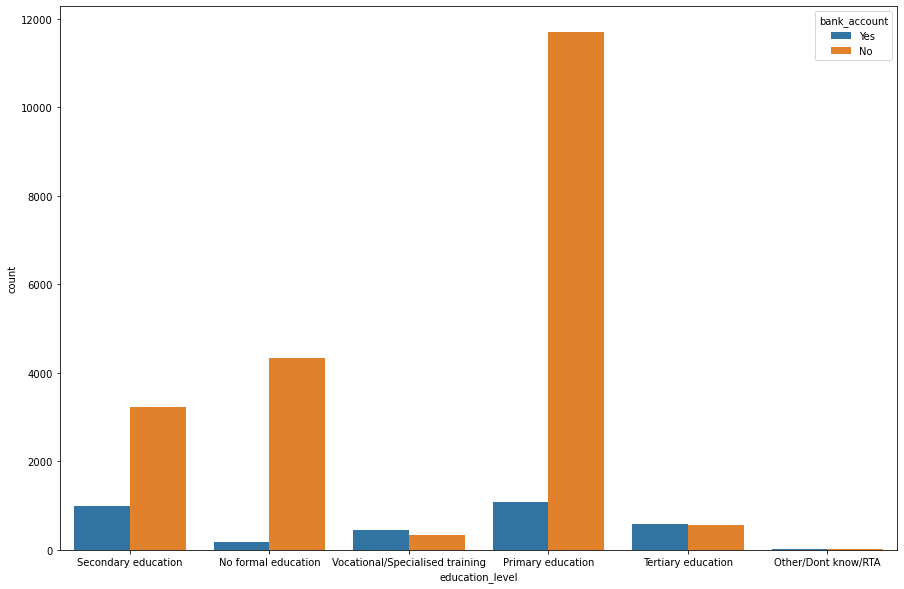

In [121]:
plt.figure(figsize=[15,10])
sns.countplot(train['education_level'], data=train, hue='bank_account')
plt.show()

C:\Users\ppiko\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


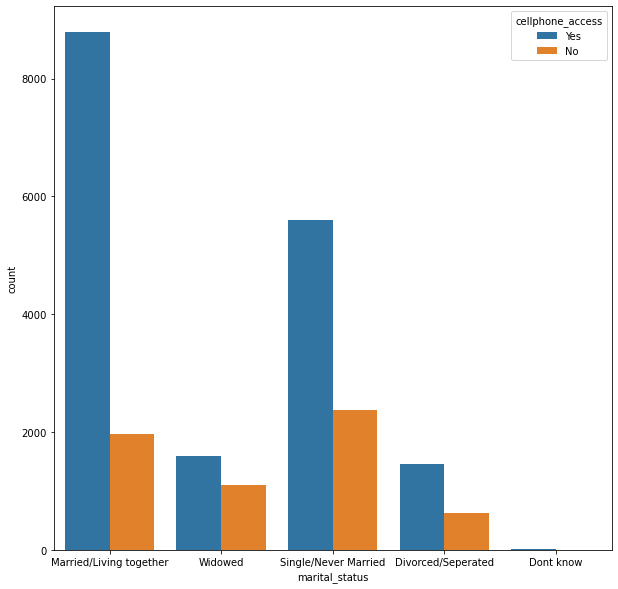

In [115]:
plt.figure(figsize=[10,10])
sns.countplot(train['marital_status'], data=train, hue='cellphone_access')
plt.show()

C:\Users\ppiko\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


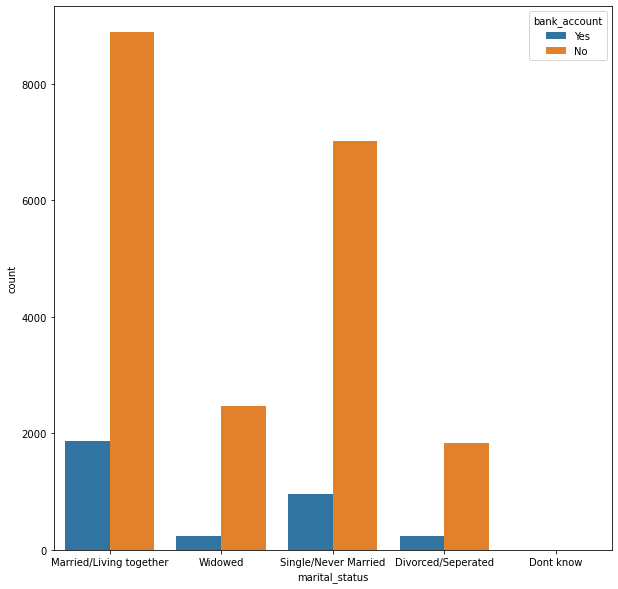

In [116]:
plt.figure(figsize=[10,10])
sns.countplot(train['marital_status'], data=train, hue='bank_account')
plt.show()

C:\Users\ppiko\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


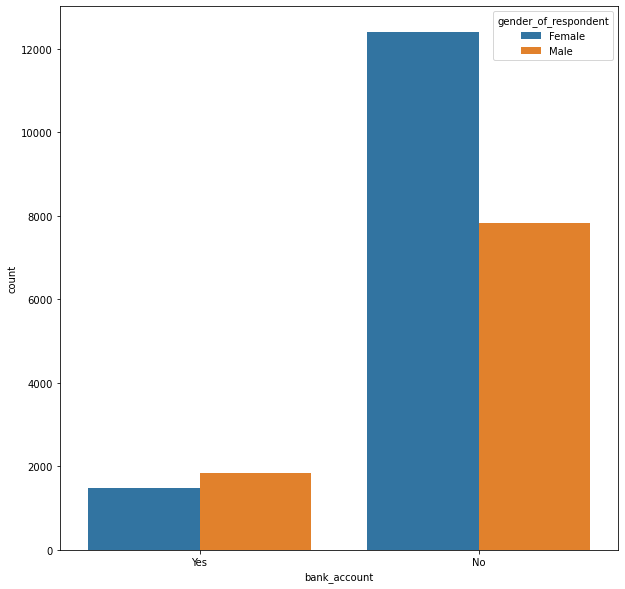

In [118]:
plt.figure(figsize=[10,10])
sns.countplot(train['bank_account'], data=train, hue='gender_of_respondent')
plt.show()

In [ ]:
plt.figure(figsize=[10,10])
sns.countplot(train['education_level'], data=train, hue='gender_of_respondent')
plt.show()

C:\Users\ppiko\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


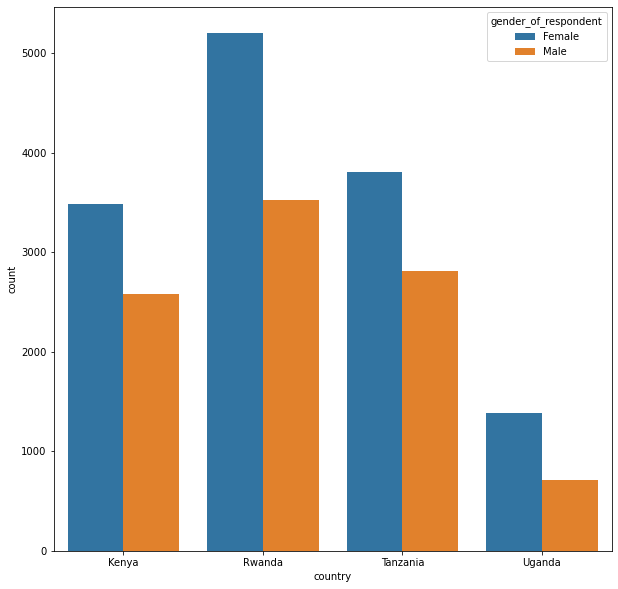

In [124]:
plt.figure(figsize=[10,10])
sns.countplot(train['country'], data=train, hue='gender_of_respondent')
plt.show()

C:\Users\ppiko\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


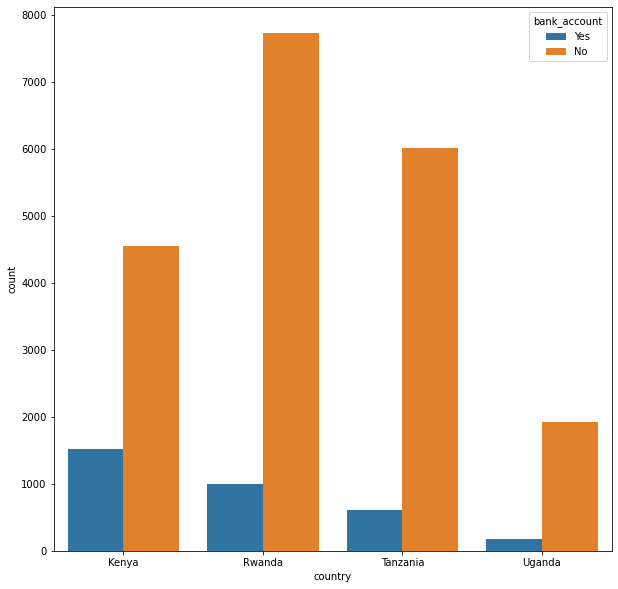

In [125]:
plt.figure(figsize=[10,10])
sns.countplot(train['country'], data=train, hue='bank_account')
plt.show()

In [185]:
pd.DataFrame(train.value_counts(train['job_type']), columns=['Count'])

,Count
job_type,
Self employed,6437
Informally employed,5597
Farming and Fishing,5441
Remittance Dependent,2527
Other Income,1080
Formally employed Private,1055
No Income,627
Formally employed Government,387
Government Dependent,247


In [165]:
train['location_type'] = train['location_type'].map({"Urban":1,"Rural":0})

In [166]:
train

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,0,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,0,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,1,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,0,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,1,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,0,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,0,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,0,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,1,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [168]:
test['location_type'] = test['location_type'].map({"Urban":1,"Rural":0})

In [169]:
test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,1,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,1,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,0,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,0,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,1,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,0,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,1,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,1,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,0,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [171]:
train['bank_account'] = train['bank_account'].map({"Yes":1,"No":0})

In [172]:
train 

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,0,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,1,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,0,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,0,0,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,0,0,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,0,1,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [174]:
train['cellphone_access'] = train['cellphone_access'].map({"Yes":1,"No":0})

In [175]:
train 

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,0,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,1,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,0,1,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,1,0,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,0,1,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,0,0,1,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,0,0,1,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,0,1,1,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [177]:
train['gender_of_respondent'] = train['gender_of_respondent'].map({"Female":1,"Male":0})

In [178]:
train 

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,1,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,0,5,70,1,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,1,5,26,0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,0,1,5,34,1,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,1,0,8,26,0,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,0,1,4,48,1,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,0,0,1,2,27,1,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,0,0,1,5,27,1,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,0,1,1,7,30,1,Parent,Divorced/Seperated,Secondary education,Self employed


In [179]:
test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,1,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,1,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,0,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,0,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,1,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,0,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,1,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,1,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,0,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [180]:
test['cellphone_access'] = test['cellphone_access'].map({"Yes":1,"No":0})

In [181]:
test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,1,1,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,1,1,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,0,0,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,0,0,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,1,0,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,0,0,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,1,1,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,1,1,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,0,1,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [182]:
test['gender_of_respondent'] = test['gender_of_respondent'].map({"Female":1,"Male":0})

In [183]:
test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,1,1,3,30,0,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,1,1,7,51,0,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,0,0,3,77,1,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,0,0,6,39,1,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,1,0,3,16,0,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,0,0,2,62,1,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,1,1,8,42,0,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,1,1,1,39,0,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,0,1,6,28,1,Spouse,Married/Living together,Primary education,Self employed


In [184]:
train 

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,1,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,0,5,70,1,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,1,5,26,0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,0,1,5,34,1,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,1,0,8,26,0,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,0,1,4,48,1,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,0,0,1,2,27,1,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,0,0,1,5,27,1,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,0,1,1,7,30,1,Parent,Divorced/Seperated,Secondary education,Self employed


In [187]:
train['job_type'].describe()

count             23524
unique               10
top       Self employed
freq               6437
Name: job_type, dtype: object

In [ ]:
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126

In [188]:
train['job_type'] = train['job_type'].map({"Self employed":1,"Informally employed":1,"Formally employed Private":1,"Formally employed Government":1,"Farming and Fishing":0,"Remittance Dependent":0,"Other Income":0,"No Income":0,"Government Dependent":0,"Dont Know/Refuse to answer":0})

In [189]:
train

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,1,Spouse,Married/Living together,Secondary education,1
1,Kenya,2018,uniqueid_2,0,0,0,5,70,1,Head of Household,Widowed,No formal education,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,0,Other relative,Single/Never Married,Vocational/Specialised training,1
3,Kenya,2018,uniqueid_4,0,0,1,5,34,1,Head of Household,Married/Living together,Primary education,1
4,Kenya,2018,uniqueid_5,0,1,0,8,26,0,Child,Single/Never Married,Primary education,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,0,1,4,48,1,Head of Household,Divorced/Seperated,No formal education,0
23520,Uganda,2018,uniqueid_2114,0,0,1,2,27,1,Head of Household,Single/Never Married,Secondary education,0
23521,Uganda,2018,uniqueid_2115,0,0,1,5,27,1,Parent,Widowed,Primary education,0
23522,Uganda,2018,uniqueid_2116,0,1,1,7,30,1,Parent,Divorced/Seperated,Secondary education,1


In [190]:
test['job_type'] = test['job_type'].map({"Self employed":1,"Informally employed":1,"Formally employed Private":1,"Formally employed Government":1,"Farming and Fishing":0,"Remittance Dependent":0,"Other Income":0,"No Income":0,"Government Dependent":0,"Dont Know/Refuse to answer":0})

In [191]:
test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,1,1,3,30,0,Head of Household,Married/Living together,Secondary education,1
1,Kenya,2018,uniqueid_6060,1,1,7,51,0,Head of Household,Married/Living together,Vocational/Specialised training,1
2,Kenya,2018,uniqueid_6065,0,0,3,77,1,Parent,Married/Living together,No formal education,0
3,Kenya,2018,uniqueid_6072,0,0,6,39,1,Head of Household,Married/Living together,Primary education,0
4,Kenya,2018,uniqueid_6073,1,0,3,16,0,Child,Single/Never Married,Secondary education,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,0,0,2,62,1,Spouse,Married/Living together,Primary education,1
10082,Uganda,2018,uniqueid_2999,1,1,8,42,0,Head of Household,Married/Living together,Primary education,1
10083,Uganda,2018,uniqueid_3000,1,1,1,39,0,Head of Household,Single/Never Married,Secondary education,0
10084,Uganda,2018,uniqueid_3001,0,1,6,28,1,Spouse,Married/Living together,Primary education,1


In [195]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [196]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,1,Spouse,Married/Living together,Secondary education,1
1,Kenya,2018,uniqueid_2,0,0,0,5,70,1,Head of Household,Widowed,No formal education,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,0,Other relative,Single/Never Married,Vocational/Specialised training,1
3,Kenya,2018,uniqueid_4,0,0,1,5,34,1,Head of Household,Married/Living together,Primary education,1
4,Kenya,2018,uniqueid_5,0,1,0,8,26,0,Child,Single/Never Married,Primary education,1


In [202]:
X = train[['location_type','cellphone_access', 'household_size', 'age_of_respondent','gender_of_respondent', 'job_type']]

In [203]:
X

,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,job_type
0,0,1,3,24,1,1
1,0,0,5,70,1,0
2,1,1,5,26,0,1
3,0,1,5,34,1,1
4,1,0,8,26,0,1
...,...,...,...,...,...,...
23519,0,1,4,48,1,0
23520,0,1,2,27,1,0
23521,0,1,5,27,1,0
23522,1,1,7,30,1,1


In [206]:
y = train[['bank_account']]

In [207]:
y

,bank_account
0,1
1,0
2,1
3,0
4,0
...,...
23519,0
23520,0
23521,0
23522,0


In [208]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,1,1,3,30,0,Head of Household,Married/Living together,Secondary education,1
1,Kenya,2018,uniqueid_6060,1,1,7,51,0,Head of Household,Married/Living together,Vocational/Specialised training,1
2,Kenya,2018,uniqueid_6065,0,0,3,77,1,Parent,Married/Living together,No formal education,0
3,Kenya,2018,uniqueid_6072,0,0,6,39,1,Head of Household,Married/Living together,Primary education,0
4,Kenya,2018,uniqueid_6073,1,0,3,16,0,Child,Single/Never Married,Secondary education,0


In [209]:
test = test[['location_type','cellphone_access', 'household_size', 'age_of_respondent','gender_of_respondent', 'job_type']]

In [210]:
test

,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,job_type
0,1,1,3,30,0,1
1,1,1,7,51,0,1
2,0,0,3,77,1,0
3,0,0,6,39,1,0
4,1,0,3,16,0,0
...,...,...,...,...,...,...
10081,0,0,2,62,1,1
10082,1,1,8,42,0,1
10083,1,1,1,39,0,0
10084,0,1,6,28,1,1


In [213]:
identifier = train[['year','country','uniqueid']]

In [214]:
identifier 

,year,country,uniqueid
0,2018,Kenya,uniqueid_1
1,2018,Kenya,uniqueid_2
2,2018,Kenya,uniqueid_3
3,2018,Kenya,uniqueid_4
4,2018,Kenya,uniqueid_5
...,...,...,...
23519,2018,Uganda,uniqueid_2113
23520,2018,Uganda,uniqueid_2114
23521,2018,Uganda,uniqueid_2115
23522,2018,Uganda,uniqueid_2116


In [260]:
id = train['uniqueid']

In [261]:
id

0           uniqueid_1
1           uniqueid_2
2           uniqueid_3
3           uniqueid_4
4           uniqueid_5
             ...      
23519    uniqueid_2113
23520    uniqueid_2114
23521    uniqueid_2115
23522    uniqueid_2116
23523    uniqueid_2117
Name: uniqueid, Length: 23524, dtype: object

# Start the Modelling Using Logistic Regression

In [218]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state = 100)

In [219]:
X_train

,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,job_type
14327,0,0,4,62,0,0
4136,1,1,2,55,1,1
13,0,0,8,31,1,1
18920,1,1,2,37,1,1
10733,0,1,9,20,1,1
...,...,...,...,...,...,...
79,0,0,4,42,1,0
12119,0,1,7,22,1,0
14147,0,1,3,23,0,1
23320,0,1,6,60,1,1


In [220]:
y_train

,bank_account
14327,0
4136,0
13,0
18920,0
10733,0
...,...
79,0
12119,0
14147,0
23320,0


In [221]:
lr = LogisticRegression()

In [222]:
lr.fit(X_train,y_train)

C:\Users\ppiko\anaconda33\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [223]:
lr.intercept_

array([-4.56583392])

In [224]:
lr.coef_

array([[ 0.53478498,  2.602477  , -0.02827139,  0.01175999, -0.50936567,
         0.26088246]])

In [225]:
lr.coef_.shape

(1, 6)

In [238]:
pd.DataFrame(lr.coef_.transpose(), index=O, columns=['Coefficient'])

,Coefficient
location_type,0.534785
cellphone_access,2.602477
household_size,-0.028271
age_of_respondent,0.011760
gender_of_respondent,-0.509366
job_type,0.260882


In [236]:
O = (['location_type', 'cellphone_access', 'household_size',
       'age_of_respondent', 'gender_of_respondent', 'job_type'])

In [239]:
prediction = lr.predict(X_test)

In [240]:
prediction 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [241]:
accuracy_score(prediction,y_test)

0.8568999716633607

In [242]:
matrix = confusion_matrix(y_test, prediction)

In [243]:
matrix 

array([[6048,    0],
       [1010,    0]], dtype=int64)

In [244]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6048
           1       0.00      0.00      0.00      1010

    accuracy                           0.86      7058
   macro avg       0.43      0.50      0.46      7058
weighted avg       0.73      0.86      0.79      7058



C:\Users\ppiko\anaconda33\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ppiko\anaconda33\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ppiko\anaconda33\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [245]:
final_prediction = lr.predict(test)

In [246]:
final_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [247]:
final_prediction1 = lr.predict_proba(test)

In [248]:
final_prediction1

array([[0.71088869, 0.28911131],
       [0.68261814, 0.31738186],
       [0.98599856, 0.01400144],
       ...,
       [0.73070529, 0.26929471],
       [0.8861686 , 0.1138314 ],
       [0.80819311, 0.19180689]])

In [249]:
final_prediction1 = lr.predict_proba(test)[:,1]

In [250]:
final_prediction1

array([0.28911131, 0.31738186, 0.01400144, ..., 0.26929471, 0.1138314 ,
       0.19180689])

In [251]:
final_prediction1.shape

(10086,)

In [272]:
iid.shape 

(10086,)

In [276]:
submission = pd.DataFrame({'Unique_Id':iid, 'Pred_%':final_prediction1, 'Prediction':final_prediction})

In [277]:
submission 

,Unique_Id,Pred_%,Prediction
0,uniqueid_6056,0.289111,0
1,uniqueid_6060,0.317382,0
2,uniqueid_6065,0.014001,0
3,uniqueid_6072,0.008275,0
4,uniqueid_6073,0.019309,0
...,...,...,...
10081,uniqueid_2998,0.015646,0
10082,uniqueid_2999,0.289063,0
10083,uniqueid_3000,0.269295,0
10084,uniqueid_3001,0.113831,0


In [279]:
submission.to_csv('Fin_Incl_AfricaII.csv')